In [35]:
using LinearAlgebra
using ProgressMeter
using Plots
using Random

n1=1000
W=randn(n1,1);  #Modelling N(0,1) distributed W^[1]
b=randn(n1,1);  #Modelling N(0,1) distributed b^[0]
W0=randn(1,n1); #Modelling N(0,1) distributed W^[0]

In [36]:
Nx=21
xa=-1.0
xb=1.0

xVec=collect(range(-1.0,stop=1.0,length=Nx));
yVec=sin.(2*pi*xVec) .+ 0.1*randn(size(xVec));  # Einhver plat gögn

In [37]:
#
#
#
function fModel(xVec,activation="sigmoid")
    f=zeros(length(xVec))
    if(activation=="relu") 
        s3(x) = x > 0.0 ? x : 0.0
        for n=1:length(xVec)
            f[n]=((W0/sqrt(n1)) * s3.(W *xVec[n] + b))[1]
        end
    elseif(activation=="tanh") 
        s2(x) = tanh(x)
        for n=1:length(xVec)
            f[n]=((W0/sqrt(n1)) * s2.(W *xVec[n] + b))[1]
        end
    else
        s1(x) = exp(x)/(1+exp(x))
        for n=1:length(xVec)
            f[n]=((W0/sqrt(n1)) * s1.(W *xVec[n] + b))[1]
        end
    end
    
    return f
end

fModel (generic function with 2 methods)

In [38]:
using Flux
include("normNTK.jl")

my_sigm = Chain(Dense(1,n1,sigmoid), Dense(n1,1))|>f64

p(x) = Flux.params(my_sigm)[x]


p(3) .= W' # ath bylt því julia skilgreinir öfugt við glósur frá sie
p(2) .= b
p(1) .= W0'

for i in Flux.params(my_sigm)
    display(i)
end

1000×1 Matrix{Float64}:
 -1.5342701590714112
  0.8717017442574837
  0.19101299402442112
  1.1378443518186188
 -0.07829233078087751
 -0.31525437273590595
 -0.7735994449983495
  1.897400948702724
 -0.7536080287103649
 -1.3507222789824778
  ⋮
 -1.392940501086279
  0.26075885560881734
 -1.5531968426410308
  1.7517919499449794
 -0.6641312942681066
  0.5439402557515393
 -1.2864982515332262
 -0.2354706610168469
 -0.004638381156414649

1000-element Vector{Float64}:
  0.3543292282078641
 -0.9350254868781152
 -1.0486636339592572
  0.6991368277354363
 -0.952094449561356
 -1.3426410267388553
  0.5864529927728158
  1.8615795979655663
 -0.19310106955827963
 -0.3068753289563169
  ⋮
 -0.3906995553153358
  0.1577147220647213
 -0.8657569960869411
  0.17606312469231036
  0.7479624225765672
 -1.4294366433972552
  2.254357914419729
 -0.02656817271393108
 -0.7168177611300807

1×1000 Matrix{Float64}:
 1.48295  0.0808678  -0.319375  -0.680059  …  0.264626  0.0863872  -1.74412

1-element Vector{Float64}:
 0.0

In [25]:
#norm_weights(my_sigm)
for i in Flux.params(my_sigm)
    display(i) 
end

1000×1 Matrix{Float64}:
  0.7608459075989491
 -0.7639611250234901
 -0.19871676233211907
 -1.4234979587915526
  0.455904033062462
 -0.6657813251233438
 -1.5087563093139467
 -0.6924572435227405
  1.1017703740125504
 -0.05148091076576259
  ⋮
 -0.4172186043757004
  0.17472094777432595
  0.6870119628757987
 -0.402333472819633
 -1.5290431963789337
  0.8597994661701532
 -0.29142580166132326
  0.1342709305124069
 -0.23067010493126616

1000-element Vector{Float64}:
 -0.5792300798673955
 -1.5550204209406828
 -1.9503663026127374
 -1.69725436534486
  0.4091916233408497
 -0.12545398664668525
  0.13275454825358318
 -2.880663033826452
 -1.906851622940943
  0.9944278052729856
  ⋮
 -1.6510017997409923
  1.9494008093275927
 -1.3901873625761032
  0.8049826571415775
 -0.381624758797698
 -1.8169578906987494
  0.33785823377335295
 -0.586068448753738
  0.4688048161701907

1×1000 Matrix{Float64}:
 0.00732115  -0.0149388  0.00725931  …  0.0414594  0.00419061  0.0094024

1-element Vector{Float64}:
 0.0

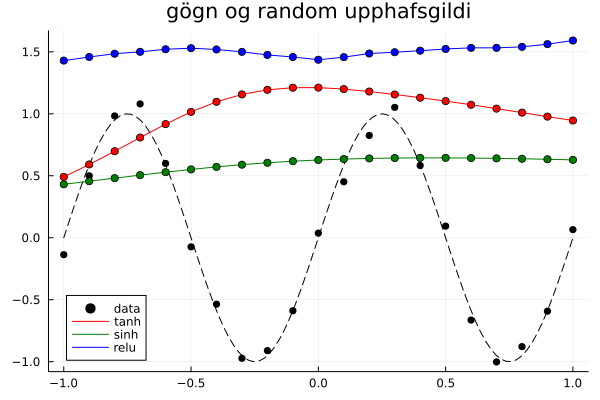

In [6]:
scatter(xVec,yVec,label="data",color="black")
xVecLong=collect(range(-1.0,stop=1.0,length=100))
plot!(xVecLong,sin.(2*pi*xVecLong),color="black",linestyle=:dash,label="")
plot!(xVec,fModel(xVec,"tanh"),color="red",label="tanh")
scatter!(xVec,fModel(xVec,"tanh"),color="red",label="")
plot!(xVec,fModel(xVec,"sinh"),color="green",label="sinh")
scatter!(xVec,fModel(xVec,"sinh"),color="green",label="")
plot!(xVec,fModel(xVec,"relu"),color="blue",label="relu")
scatter!(xVec,fModel(xVec,"relu"),color="blue",label="")
plot!(title="gögn og random upphafsgildi")

# Stationary limit of the NTK kernel

If we have a three layer network ($n_0=1$:$n_1=N_h$:$n_2=1$) then the NTK kernel can be calculated explicitly for $N$ inputs of  $x_n \in [a,b]$, $i=n, \dots, N$.
$\begin{eqnarray}
K_{m,n}&=&\sum_{j=1}^{n_1}\frac{1}{n_1}\sigma(W^{[0]}_{j,1}x_n+b^{[0]}_{j}) \sigma(W^{[0]}_{j,1}x_m+b^{[0]}_{j}) \nonumber \\
&+& (1+x_m x_n)\sum_{j=1}^{n_1} \frac{1}{n_1} (W^{[0]}_{j,1})^2 \sigma'(W^{[0]}_{j,1}x_n+b^{[0]}_{j}) \sigma'(W^{[0]}_{j,1}x_m+b^{[0]}_{j}),
\end{eqnarray}$
where $\sigma(\cdot)$ is the activation function.
Using standard Monte Carlo argumentation this quantity will tend to
$\begin{eqnarray}
K^\infty_{m,n}&=& \frac{1}{2\pi} \int dW db \biggl ( \sigma(W x_n+b) \sigma(W x_m+b)  + (1+x_m x_n) W^2 \sigma'(Wx_n+b) \sigma'(Wx_m+b)  \biggr )
\end{eqnarray}

In [39]:
#
#  Here we define the kernel matrix functions 
#
function Ksigmoid(xm,xn)
    s(x)=exp(x)/(1+exp(x))
    sDiff(x)=s(x)*(1-s(x))
    
    I1=0.0
    for j=1:length(W)
        I1=I1+s(W[j]*xm+b[j])*s(W[j]*xn+b[j])+(1+xn*xm)*W[j]^2*sDiff(W[j]*xm+b[j])*sDiff(W[j]*xn+b[j])
    end
    return I1/length(W)
end

function Ktanh(xm,xn)
    s(x)=tanh(x)
    sDiff(x)=sech(x)^2
    
    I1=0.0
    for j=1:length(W)
        I1=I1+s(W[j]*xm+b[j])*s(W[j]*xn+b[j])+(1+xn*xm)*W[j]^2*sDiff(W[j]*xm+b[j])*sDiff(W[j]*xn+b[j])
    end
    return I1/length(W)
end

function Krelu(xm,xn)
    s(x)= x>0.0 ? x : 0.0
    sDiff(x)= x>0.0 ? 1.0 : 0.0
    
    I1=0.0
    for j=1:length(W)
        I1=I1+s(W[j]*xm+b[j])*s(W[j]*xn+b[j])+(1+xn*xm)*W[j]^2*sDiff(W[j]*xm+b[j])*sDiff(W[j]*xn+b[j])
    end
    return I1/length(W)
end

Krelu (generic function with 1 method)

In [40]:
Ks=zeros(Nx,Nx)
Kt=zeros(Nx,Nx)
Kr=zeros(Nx,Nx)

@showprogress desc="Computing..." for m=1:Nx
    for n=1:Nx
        xm=xVec[m]
        xn=xVec[n]
        Ks[m,n]=Ksigmoid(xm,xn)
        Kt[m,n]=Ktanh(xm,xn)
        Kr[m,n]=Krelu(xm,xn)
    end
end

K_sigm = kernel(my_sigm, hcat(xVec...));

Computing...  10%|████                                   |  ETA: 0:00:02

Computing...  24%|██████████                             |  ETA: 0:00:01

Computing...  38%|███████████████                        |  ETA: 0:00:01

Computing...  52%|█████████████████████                  |  ETA: 0:00:01

Computing...  67%|███████████████████████████            |  ETA: 0:00:00

Computing...  81%|████████████████████████████████       |  ETA: 0:00:00

Computing...  95%|██████████████████████████████████████ |  ETA: 0:00:00

Computing... 100%|███████████████████████████████████████| Time: 0:00:01


In [41]:
ratio_matrix = (Ks./(K_sigm/n1))
ratio = (ones(1,21)*ratio_matrix*ones(21,1))/(21^2)*100

display(ratio)

display(Ks)
display(K_sigm/n1)

display(ratio_matrix)

1×1 Matrix{Float64}:
 98.83942576228205

21×21 Matrix{Float64}:
 0.352003  0.349502  0.346432  0.342759  …  0.249247  0.244074  0.239281
 0.349502  0.347538  0.345026  0.341923     0.254012  0.248999  0.244351
 0.346432  0.345026  0.343102  0.34061      0.259094  0.254258  0.249769
 0.342759  0.341923  0.34061   0.33876      0.264482  0.259843  0.255528
 0.338465  0.338202  0.33751   0.336326     0.270153  0.265735  0.261613
 0.333556  0.333857  0.333787  0.333278  …  0.276074  0.271904  0.267996
 0.328063  0.328908  0.329447  0.329609     0.282199  0.278308  0.274638
 0.322042  0.323404  0.324529  0.325345     0.288468  0.28489   0.281486
 0.315578  0.317422  0.319099  0.320542     0.294813  0.291586  0.288478
 0.308772  0.311059  0.31325   0.315282     0.301155  0.298319  0.295542
 ⋮                                       ⋱                      ⋮
 0.287457  0.290841  0.29432   0.297851     0.319284  0.317875  0.316311
 0.280422  0.284101  0.287928  0.291866     0.324728  0.323873  0.32279
 0.273578  0.277522  0.281659  0.285

21×21 Matrix{Float64}:
 0.372901  0.368424  0.363434  0.357924  …  0.245348  0.238614  0.232191
 0.368424  0.364552  0.360189  0.355323     0.251221  0.244871  0.238809
 0.363434  0.360189  0.356481  0.352294     0.25736   0.251422  0.245745
 0.357924  0.355323  0.352294  0.348817     0.263749  0.258249  0.252982
 0.351906  0.349959  0.347627  0.344884     0.270358  0.265326  0.260495
 0.345405  0.344119  0.342495  0.340503  …  0.277152  0.272618  0.268249
 0.338463  0.337838  0.336925  0.335694     0.284086  0.280079  0.276201
 0.331135  0.331164  0.330959  0.330489     0.291104  0.287655  0.284293
 0.323485  0.324156  0.32465   0.324934     0.298143  0.295282  0.292464
 0.315584  0.316882  0.318059  0.319081     0.305137  0.302891  0.300642
 ⋮                                       ⋱                      ⋮
 0.291173  0.294223  0.297309  0.300403     0.325162  0.3249    0.324492
 0.283061  0.286646  0.290314  0.294038     0.331317  0.331747  0.331986
 0.275076  0.27917   0.283391  0.28

21×21 Matrix{Float64}:
 0.943958  0.948641  0.953219  0.957629  …  1.01589   1.02288   1.03054
 0.948641  0.953329  0.957904  0.962288     1.01111   1.01686   1.02321
 0.953219  0.957904  0.962471  0.966834     1.00674   1.01128   1.01637
 0.957629  0.962288  0.966834  0.971169     1.00278   1.00617   1.01007
 0.961806  0.966403  0.970898  0.975185     0.999241  1.00154   1.00429
 0.965696  0.970178  0.974576  0.97878   …  0.996109  0.997382  0.999057
 0.969271  0.973568  0.977806  0.981875     0.993357  0.993674  0.994342
 0.97254   0.976568  0.98057   0.984435     0.990947  0.990388  0.990125
 0.975556  0.979223  0.9829    0.986483     0.988831  0.987483  0.986372
 0.978414  0.981623  0.984881  0.988093     0.986951  0.984906  0.983034
 ⋮                                       ⋱                      ⋮
 0.98724   0.988507  0.989947  0.991506     0.981925  0.978379  0.974789
 0.990678  0.991124  0.991781  0.992613     0.980112  0.976265  0.972299
 0.994552  0.994095  0.99389   0.99391  

In [10]:
function fModel_t(t,K,f0,y)
    Ft=zeros(size(f0))
    E,U=eigen(K)
    F0=U'*f0
    Y=U'*y
    for n=1:length(f0)
       Ft[n]=exp(-E[n]*t)*F0[n]+(1.0-exp(-E[n]*t))Y[n] 
    end
    return U*Ft 
end

fModel_t (generic function with 1 method)

┌ Info: Saved animation to c:\Github\UROP\anim.gif
└ @ Plots C:\Users\Axel Bjarkar\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Github\\UROP\\anim.gif")
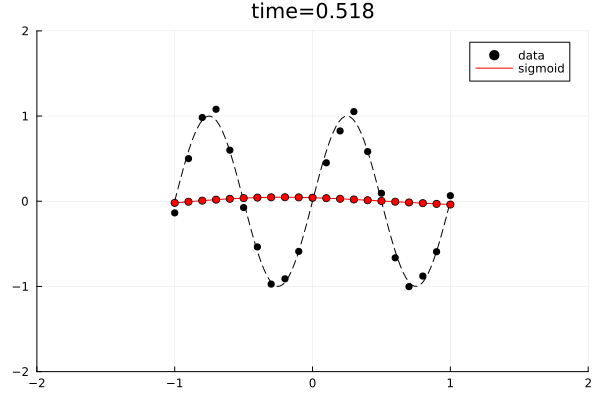

In [11]:
tMax=1e14
Nt=100
tPow=[-2:(Nt-2)...]
tVec=(10^(log10(tMax)/(Nt-2))).^tPow
anim = @animate for tn=1:Nt
    t=tVec[tn]
    scatter(xVec,yVec,label="data",color="black")
    xVecLong=collect(range(-1.0,stop=1.0,length=100))
    plot!(xVecLong,sin.(2*pi*xVecLong),color="black",linestyle=:dash,label="")
    plot!(xVec,fModel_t(t,Ks,fModel(xVec,"sigmoid"),yVec),color="red",label="sigmoid")
    p=scatter!(xVec,fModel_t(t,Ks,fModel(xVec,"sigmoid"),yVec),color="red",label="",xlims = (-2, 2), ylims=(-2, 2),
        title="time=$(round(t;sigdigits = 3))"
    )
end
gif(anim, "anim.gif", fps = 10,loop=0)

┌ Info: Saved animation to c:\Github\UROP\anim_tanh.gif
└ @ Plots C:\Users\Axel Bjarkar\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Github\\UROP\\anim_tanh.gif")
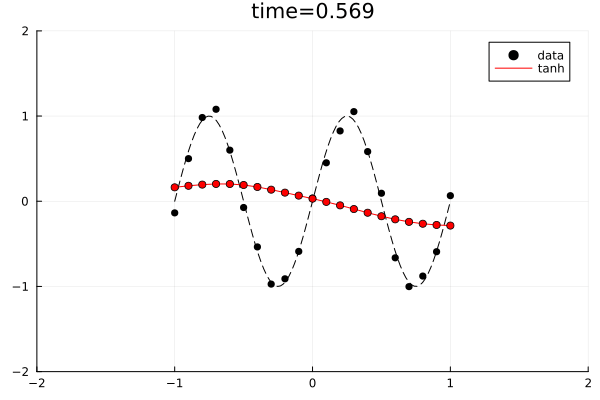

In [12]:
tMax=1e12
Nt=100
tPow=[-2:(Nt-2)...]
tVec=(10^(log10(tMax)/(Nt-2))).^tPow
anim = @animate for tn=1:Nt
    t=tVec[tn]
    scatter(xVec,yVec,label="data",color="black")
    xVecLong=collect(range(-1.0,stop=1.0,length=100))
    plot!(xVecLong,sin.(2*pi*xVecLong),color="black",linestyle=:dash,label="")
    plot!(xVec,fModel_t(t,Kt,fModel(xVec,"tanh"),yVec),color="red",label="tanh")
    p=scatter!(xVec,fModel_t(t,Kt,fModel(xVec,"tanh"),yVec),color="red",label="",xlims = (-2, 2), ylims=(-2, 2),
        title="time=$(round(t;sigdigits = 3))"
    )
end
gif(anim, "anim_tanh.gif", fps = 10)

┌ Info: Saved animation to c:\Github\UROP\anim_relu.gif
└ @ Plots C:\Users\Axel Bjarkar\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Github\\UROP\\anim_relu.gif")
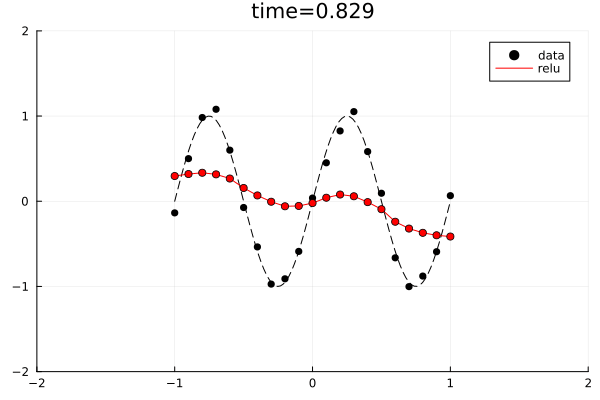

In [13]:
tMax=1e4
Nt=100
tPow=[-2:(Nt-2)...]
tVec=(10^(log10(tMax)/(Nt-2))).^tPow
anim = @animate for tn=1:Nt
    t=tVec[tn]
    scatter(xVec,yVec,label="data",color="black")
    xVecLong=collect(range(-1.0,stop=1.0,length=100))
    plot!(xVecLong,sin.(2*pi*xVecLong),color="black",linestyle=:dash,label="")
    plot!(xVec,fModel_t(t,Kr,fModel(xVec,"relu"),yVec),color="red",label="relu")
    p=scatter!(xVec,fModel_t(t,Kr,fModel(xVec,"relu"),yVec),color="red",label="",xlims = (-2, 2), ylims=(-2, 2),
        title="time=$(round(t;sigdigits = 3))"
    )
end
gif(anim, "anim_relu.gif", fps = 10)

In [14]:
scatter(abs.(eigKs),label="sigmoid",color="red",yaxis=:log10,key=:bottomright)
scatter!(abs.(eigKt),label="tanh",color="blue")
scatter!(abs.(eigKr),label="ReLu",color="green")

UndefVarError: UndefVarError: `eigKs` not defined

In [15]:
Er,Ur=eigen(Kr);
function fVec(t,K)
    E,U=eigen(K)
    for n=1:length(E)
       f= 
    end
end

ErrorException: syntax: unexpected "end"

In [16]:
Kr[1:6,15:21]

6×7 Matrix{Float64}:
 0.478019  0.436332  0.399471  0.36909   0.346485  0.329131  0.314373
 0.497629  0.456516  0.419664  0.38877   0.365387  0.347491  0.332028
 0.520919  0.480953  0.444683  0.413847  0.390261  0.372395  0.3568
 0.543164  0.505243  0.470452  0.440573  0.417681  0.400743  0.385913
 0.572166  0.536348  0.503093  0.474228  0.452087  0.436134  0.422127
 0.605404  0.572112  0.540817  0.51339   0.492425  0.477881  0.465119

In [17]:
Kt[1:6,15:21]

6×7 Matrix{Float64}:
 0.237235  0.187228  0.141604  0.100262  0.0629872  0.0294903  -0.000562425
 0.272963  0.222258  0.176067  0.134287  0.0966922  0.0629754   0.032785
 0.312423  0.260979  0.214149  0.171846  0.133841   0.0998166   0.0694057
 0.355799  0.303608  0.256076  0.213157  0.174638   0.140199    0.109465
 0.403183  0.350295  0.30202   0.258394  0.219244   0.184267    0.153085
 0.454529  0.401092  0.352078  0.307668  0.267767   0.23211     0.200334

In [18]:
Ks[1:6,15:21]

6×7 Matrix{Float64}:
 0.275169  0.268685  0.262488  0.25662   0.251105  0.245956  0.241175
 0.279647  0.27342   0.267454  0.261791  0.256462  0.251481  0.246853
 0.284354  0.278426  0.272725  0.267298  0.262178  0.257383  0.252922
 0.289267  0.283687  0.27829   0.273131  0.268246  0.263659  0.25938
 0.294352  0.289171  0.284124  0.279269  0.274648  0.270292  0.266214
 0.29956   0.294835  0.290185  0.285675  0.281353  0.277254  0.273397

In [19]:
f=cos.(xVec)

21-element Vector{Float64}:
 0.5403023058681398
 0.6216099682706644
 0.6967067093471654
 0.7648421872844885
 0.8253356149096783
 0.8775825618903728
 0.9210609940028851
 0.955336489125606
 0.9800665778412416
 0.9950041652780258
 ⋮
 0.9800665778412416
 0.955336489125606
 0.9210609940028851
 0.8775825618903728
 0.8253356149096783
 0.7648421872844885
 0.6967067093471654
 0.6216099682706644
 0.5403023058681398

In [20]:
f'*U[:,18]

UndefVarError: UndefVarError: `U` not defined

In [21]:
U[:,21]

UndefVarError: UndefVarError: `U` not defined

In [22]:
plot([U[:,3],U[:,4],U[:,5],U[:,18]])

UndefVarError: UndefVarError: `U` not defined